In [105]:
# Importing the necessary libraries
import branca.colormap as cm
import folium
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [106]:
#read the data from my local storage
df = pd.read_csv(r"C:\Users\Paul\Downloads\final_telco.csv")

In [107]:
# Visualize data table
df.head()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,...,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,Churn Value
0,hthjctifkiudi0,1,1,71638,Female,36.000000,No,No,0.0,jeavwsrtakgq0,...,Yes,Yes,Yes,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,Churned,1
1,uqdtniwvxqzeu1,6,6,72566,Male,36.472065,No,No,0.0,qcvetdmalnkw1,...,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,Not Applicable,Not Applicable,Stayed,0
2,uqdtniwvxqzeu1,7,6,72566,Male,36.442687,No,No,0.0,qcvetdmalnkw1,...,No,No,Yes,Credit Card,vjskkxphumfai57182,3,Not Applicable,Not Applicable,Stayed,0
3,uqdtniwvxqzeu1,8,6,72566,Male,36.837888,No,No,0.0,qcvetdmalnkw1,...,No,No,Yes,Wallet Balance,cdwbcrvylqca53109,4,Not Applicable,Not Applicable,Stayed,0
4,uqdtniwvxqzeu1,9,6,72566,Male,36.490214,No,No,0.0,qcvetdmalnkw1,...,Yes,No,Yes,Credit Card,whqrmeulitfj98550,1,Not Applicable,Not Applicable,Stayed,0


In [108]:
df.shape

(500, 74)

In [109]:
# df.info()

In [110]:
df.isnull().sum()

Customer ID           0
Month                 0
Month of Joining      0
zip_code              0
Gender                0
                     ..
Satisfaction Score    0
Churn Category        0
Churn Reason          0
Customer Status       0
Churn Value           0
Length: 74, dtype: int64

In [111]:
df.describe()

,Month,Month of Joining,zip_code,Age,Number of Dependents,latitude,longitude,roam_ic,roam_og,loc_og_t2t,...,vol_4g,vol_5g,arpu,night_pck_user,fb_user,aug_vbc_5g,Number of Referrals,Streaming Data Consumption,Satisfaction Score,Churn Value
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,221.000000,202.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,9.79000,6.356000,90754.816000,36.072963,1.018624,37.635920,-114.816000,252.872458,291.074662,874.241610,...,189.020680,7547.796420,728.311400,0.185520,0.806931,611.820759,4.64600,28.098000,3.120000,0.038000
std,3.18971,2.935728,8121.545044,12.335795,2.230244,4.826443,10.266047,443.339289,667.139389,1630.681233,...,578.849851,36026.773819,1588.490061,0.389602,0.395688,1548.175087,3.82229,26.193675,1.220073,0.191388
min,1.00000,1.000000,71638.000000,20.000000,0.000000,31.820000,-123.690000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1989.540000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,8.00000,3.000000,90398.000000,26.000000,0.000000,34.170000,-121.450000,15.982500,18.117500,40.545000,...,0.000000,0.000000,146.462500,0.000000,1.000000,0.000000,1.00000,2.000000,3.000000,0.000000
50%,10.00000,7.000000,93151.500000,34.000000,0.000000,36.220000,-118.345000,48.285000,75.600000,176.985000,...,60.215000,343.695000,345.145000,0.000000,1.000000,97.230000,4.00000,21.000000,3.000000,0.000000
75%,12.00000,9.000000,95377.000000,45.000000,1.000000,37.995000,-117.080000,97.320434,135.070000,311.367500,...,163.547500,907.435000,565.572500,0.000000,1.000000,282.025000,8.00000,50.000000,4.000000,0.000000
max,14.00000,12.000000,99212.000000,70.000000,9.000000,48.620000,-90.460000,1717.440000,3160.320000,6396.120000,...,4481.880000,254687.000000,9329.100000,1.000000,1.000000,8148.590000,11.00000,84.000000,5.000000,1.000000


In [112]:
#Checking customers who stayed and those who churned
df['Customer Status'].value_counts()

Customer Status
Stayed     481
Churned     19
Name: count, dtype: int64

In [113]:
#Checking reasons customers indicated for leaving (churing)
df['Churn Reason'].value_counts()

Churn Reason
Not Applicable                               481
Service dissatisfaction                        3
Unknown                                        3
Attitude of service provider                   2
Lack of self-service on Website                2
Price too high                                 2
Competitor offered higher download speeds      1
Poor expertise of phone support                1
Lack of affordable download/upload speed       1
Poor expertise of online support               1
Competitor had better devices                  1
Attitude of support person                     1
43tgeh                                         1
Name: count, dtype: int64

# Observation
1. 
Not Applicable refers to cases where customer didn't churn2. 
There arre garbage values present in chur(moved eaor Deceas)d?

In [114]:
# the above churn reasons had categories, for easier analysis.
df['Churn Category'].value_counts()

Churn Category
Not Applicable     481
Support              7
Dissatisfaction      5
Unknown              3
Competitor           2
Price                2
Name: count, dtype: int64

## Observations
1. Support concerns resulted to a substantial churn number
2. Followed by dissatisfaction and competitor related strategies

In [115]:
# we expect customers to be unique, at least for each month
df['Customer ID'].value_counts()

Customer ID
riweiqtwcpxnm19    13
teequpgyuzwce14    13
mbktftapvqdaq72    13
pmjtlwcmmdtqy25    13
dyyxkbculsczc36    12
                   ..
indnlidpqqbef62     2
nfhyvxuubmklt23     2
bonclxvvaojjx60     1
pweawznndtevp33     1
hthjctifkiudi0      1
Name: count, Length: 76, dtype: int64

## Another Consideration:

1. We also have a number of reasons for the churn that we cannot influence in any way, such as relocation or death.
2. We will remove them from the dataset, since there is little such data can do and they are irrelevant in the matter of understanding how we can retain customers.

In [116]:
df = df[df['Churn Reason'] != 'Moved']
df = df[df['Churn Reason'] != 'Deceased']

In [117]:
# Categorizing data further, to ensure each reason is in correct category
df[df['Churn Category'].isin(['Other', 'Unknown', 'bcvjhdjcb', 'Attitude'])].groupby(['Churn Category', 'Churn Reason'])['Customer ID'].nunique()

Churn Category  Churn Reason
Unknown         Unknown         3
Name: Customer ID, dtype: int64

In [118]:
def clean_churn_category(category, reason):
    if reason in ['Lack of affordable download/upload speed', 'Limited range of services', 'Network reliability'] \
        or 'dissatisfaction' in reason:
        category="Dissatisfaction"
        
    if "Price" in reason:
        category="Price"
    if "Competitor" in reason:
        category="Competitor"
    if "support" in reason or reason in ['Lack of self-service on Website']:
        category="Support"
    if category in ["bcvjhdjcb", "Other", "Unknown", "Attitude"] or reason == 'Unknown':
        category="Other"
    if reason in ['Attitude of service provider']:
        category="Support"
    if reason in ['Extra data charges', 'Long distance charges']:
        category="Price"
    
    return category

    
df['Churn Category'] = df[['Churn Category', 'Churn Reason']].apply(lambda x: clean_churn_category(x['Churn Category'], x['Churn Reason']), axis=1)

## Issues to think about further in this data
1. What if we reduce the categories even more? This can simplify the analysis and our model.
2. What are the reasons for wrong mapping of churn category and churn reason in few cases? This would influence how data is collected since that is where the mistake often happens.

In [119]:
df = df[df['Churn Reason'] != '43tgeh']
df.drop(df[(df['Churn Category'] == 'Competitor') & (df['Churn Reason'] == 'Unknown')].index , inplace=True)
df['Churn Reason'] = df[['Churn Reason', 'Churn Category']]\
                .apply(lambda x: 'Unknown' if x['Churn Category']=='Other' else x['Churn Reason'], axis=1)

In [120]:
df['Churn Category'].value_counts()

Churn Category
Not Applicable     481
Support              7
Dissatisfaction      4
Other                3
Competitor           2
Price                2
Name: count, dtype: int64

# Exploratory Data Analysis

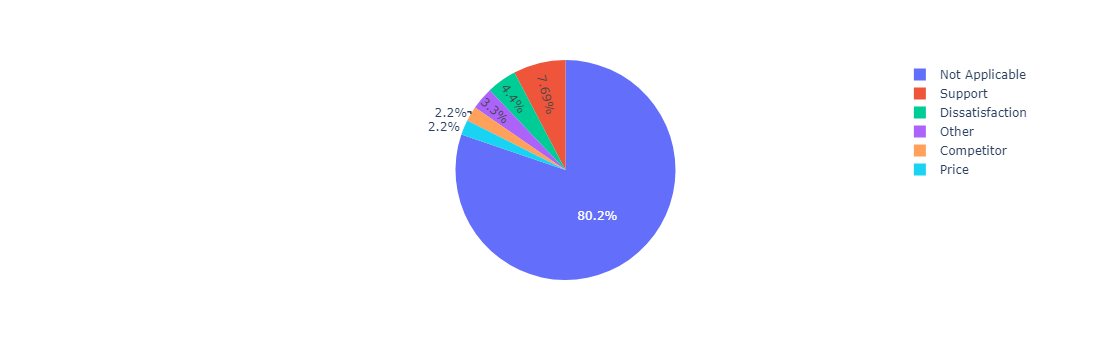

In [121]:
fig = px.pie(df.groupby('Churn Category')['Customer ID'].nunique().reset_index(), 
             values='Customer ID', 
             names='Churn Category')
fig.show()

In [122]:
# Let us count unique zip codes where data came from
df['zip_code'].nunique()

76

In [123]:
# Scatter Mapbox to show where customers are located (run this on your laptop, I commented the visual to make the entire less of less MBS)
# fig = px.scatter_mapbox(df.groupby(['latitude','longitude'])['Customer ID'].count().reset_index(), lat="latitude", lon="longitude", hover_data= ['Customer ID'], zoom=4, height=300)
# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [124]:
# group customers by states
df.groupby(['country','state'])['Customer ID'].nunique()

country  state
US       AR       12
         CA       46
         NM        7
         WA       11
Name: Customer ID, dtype: int64

In [125]:
df.drop("country", inplace=True, axis=1)

In [126]:
#group by timezone
df.groupby(['timezone'])['Customer ID'].nunique()

timezone
America/Chicago        12
America/Denver          7
America/Los_Angeles    57
Name: Customer ID, dtype: int64

In [127]:
df.drop("timezone", inplace=True, axis=1)

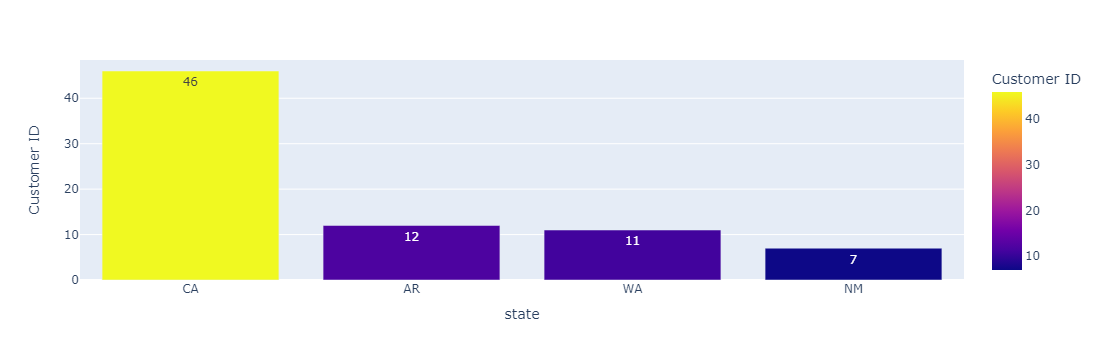

In [128]:
# Visualize Customers by State
fig = px.bar(df.groupby(['state'])['Customer ID'].nunique().reset_index().sort_values('Customer ID',
                                                                                    ascending=False).head(50),
             x='state',
             y='Customer ID', 
             color = 'Customer ID',
             text = 'Customer ID')
fig.show()

## Visualization by Hexagons to understand geographical distribution better

In [131]:
# Import the library for hierarchical hexagonal geospatial indexing system to visualize customer precise locations
import h3

In [132]:
hex_level = 5

df['hex_id'] = df.apply(lambda x: h3.geo_to_h3(x['latitude'], x['longitude'], hex_level), axis=1)

hex_counts = df.groupby('hex_id')['Customer ID'].nunique().reset_index(name='total_clients')
hex_counts['center'] = hex_counts['hex_id'].apply(lambda x: h3.h3_to_geo(x))

color_range = [hex_counts['total_clients'].min(), hex_counts['total_clients'].max()]
colormap = cm.LinearColormap(["purple","red","orange","yellow","green"],vmin = min(color_range), vmax = max(color_range))

mean_lat, mean_lon = hex_counts['center'].apply(lambda x: x[0]).mean(), hex_counts['center'].apply(lambda x: x[1]).mean()
map_center = [mean_lat, mean_lon]
m = folium.Map(location=map_center, zoom_start=6, tiles='Stamen Terrain')

for _, row in hex_counts.iterrows():
    folium.Polygon(
        locations=h3.h3_to_geo_boundary(row['hex_id']),
        fill=True,
        fill_color=colormap(row['total_clients']),
        fill_opacity=0.7,
        stroke=False,
        tooltip=f"Number of clients: {row['total_clients']}"
    ).add_to(m)

colormap.caption = 'Number of clients'
m.add_child(colormap)

m

## Observation

We see interesting hexagon with the largest number of customers in total. In general, we already know that there are many customers in Los Angeles and its surroundings. And what about the percentage of churn customers? We can also look at whether there are hexagons with an abnormally large or low percentage of churn customers.

In [133]:
# Create hex_id to check rate of customers in specific hexagons
churn = df.assign(churn_clients = np.where(df['Churn Value']==1, df['Customer ID'],None))\
            .groupby(['hex_id']).agg({'churn_clients':'count'}).reset_index()
clients = df.groupby(['hex_id'])['Customer ID'].count().reset_index()
churn_data = clients.join(churn.set_index(['hex_id']), on=['hex_id'])

churn_data['churn_rate'] = churn_data['churn_clients']/churn_data['Customer ID']

In [134]:
churn_data

,hex_id,Customer ID,churn_clients,churn_rate
0,8512db63fffffff,6,0,0.0
1,8512db77fffffff,8,0,0.0
2,8526588ffffffff,7,0,0.0
3,85265903fffffff,6,0,0.0
4,85265b67fffffff,13,0,0.0
...,...,...,...,...
63,8548c477fffffff,3,0,0.0
64,8548d5affffffff,6,0,0.0
65,8548d847fffffff,13,0,0.0
66,8548d85bfffffff,5,1,0.2


In [135]:
# # Visualize hexagons
# churn_data['center'] = churn_data['hex_id'].apply(lambda x: h3.h3_to_geo(x))


# color_range = [churn_data['churn_rate'].min(), churn_data['churn_rate'].max()]
# colormap = cm.LinearColormap(["green","orange","red"],vmin = min(color_range), vmax = max(color_range))

# mean_lat, mean_lon = churn_data['center'].apply(lambda x: x[0]).mean(), churn_data['center'].apply(lambda x: x[1]).mean()
# map_center = [mean_lat, mean_lon]
# m = folium.Map(location=map_center, zoom_start=6,  width='100%', height='80%',tiles='Stamen Terrain')

# for _, row in churn_data.iterrows():
#     folium.Polygon(
#         locations=h3.h3_to_geo_boundary(row['hex_id']),
#         fill=True,
#         fill_color=colormap(row['churn_rate']),
#         fill_opacity=0.7,
#         stroke=False,
#         tooltip=f"Churn rate: {row['churn_rate']}<br>Number of customers: {row['Customer ID']}"
#     ).add_to(m)

# colormap.caption = 'Churn rate'
# m.add_child(colormap)

# m

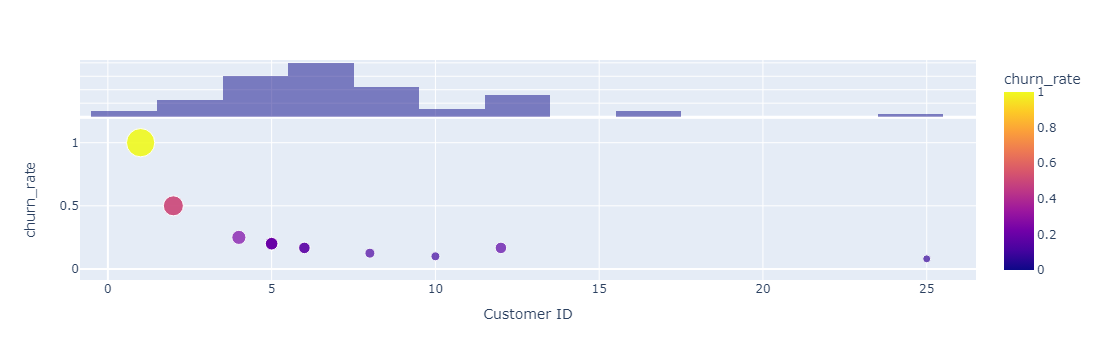

In [136]:
# Churn Rate Scatter Plot
fig = px.scatter(churn_data, x="Customer ID",
                 y="churn_rate", 
                 size = 'churn_rate', 
                 color = 'churn_rate',
                 marginal_x="histogram")
fig.show()

## Observation

We observe the churn rate above 10% percent only in hexagons, where we had a small number of customers.
Of course, we can still consider these hexagones with small number of customers and churn rate >= 10% as zones with abnormally high churn rate, but in the overall picture we do not see any geography of customers where our metric would behave totally different. Of course, we will also return to the customer geography when we look at services, payments, and so on

Ponder upon

Can we also experiment with the size of hexagons and maybe find something more interesting :)

Customer's lifetime in the service
Before we start looking at what services customers have used and their other characteristics, we should also consider how long customers have used the service and after how many months in the service, customers begin to leave us. Let's see how many months the clients who are in the churn used our service and is there a point when the largest number of customers stop using the service

In [137]:
# Months Customers Used service before leaving
df['Tenure Months'] = df['Month'] - df['Month of Joining']

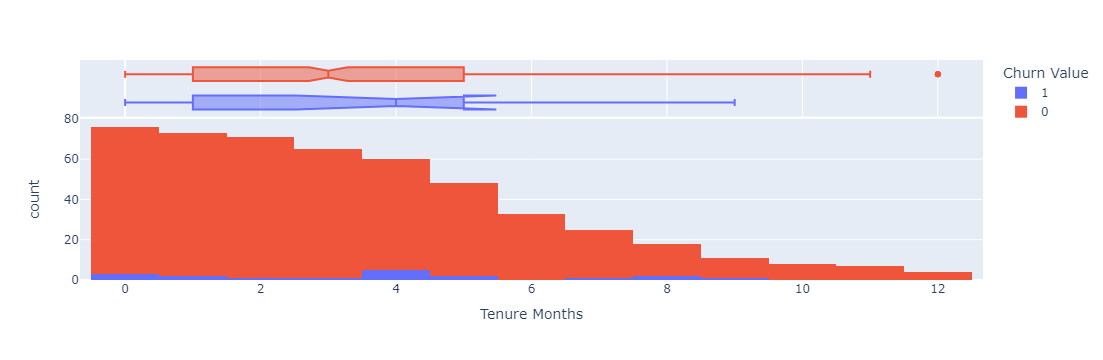

In [138]:
fig = px.histogram(df, x="Tenure Months", color="Churn Value",marginal="box" )
fig.show()

In [139]:
df.groupby('Churn Value')['Tenure Months'].quantile([.50,.75,.90,.95])

Churn Value      
0            0.50    3.00
             0.75    5.00
             0.90    7.00
             0.95    9.00
1            0.50    4.00
             0.75    5.00
             0.90    8.00
             0.95    8.15
Name: Tenure Months, dtype: float64

In [140]:
df.groupby('Churn Value')['Tenure Months'].mean()

Churn Value
0    3.413721
1    3.833333
Name: Tenure Months, dtype: float64

## Observation

50% of the customers who left the service did so in the first 2 months
Domain knowledge

The client's lifetime before the churn is very important information, Usually the first months in the service are the most risky, since customers may have their own expectations from the service and so on.

## What were the reasons for the churn mentioned by customers?
We know that in general 25.4% of customers have stopped using our service and 50% of such customers have used our service for 2 months or less.

Now we can start analyzing our customer profile data to understand which type of customers are more likely to stop using our service and what actions we can take.

But before that, we can also look at the customer responses that we have in the Churn Reason column. Of course, customer survey data is often biased, as it contains the subjective opinion of the customer, but asking the opinion of customers is very important for any business that wants to develop and improve. Moreover, we have a lot of information with which we can verify customer responses.

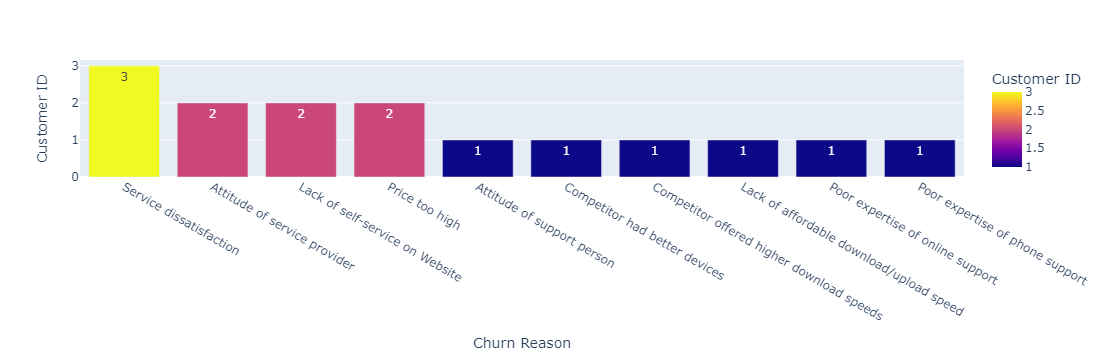

In [141]:
fig = px.bar(df[~df['Churn Reason'].isin(['Not Applicable', 'Unknown', '43tgeh'])]\
             .groupby(['Churn Reason'])['Customer ID'].nunique().reset_index()\
             .sort_values('Customer ID',ascending=False),
             x='Churn Reason',
             y='Customer ID', 
             color = 'Customer ID',
             text = 'Customer ID')
fig.show()

## Observation
6.2% of churn customers left the service due to service dissatisfaction
Another 6.1% of churn customers left the service due to Lack of self-service on Website
We also have a number of reasons for the churn that we cannot understand in any way


Total and monthly charges of clients.
Let's look at the total and data chargers of customers

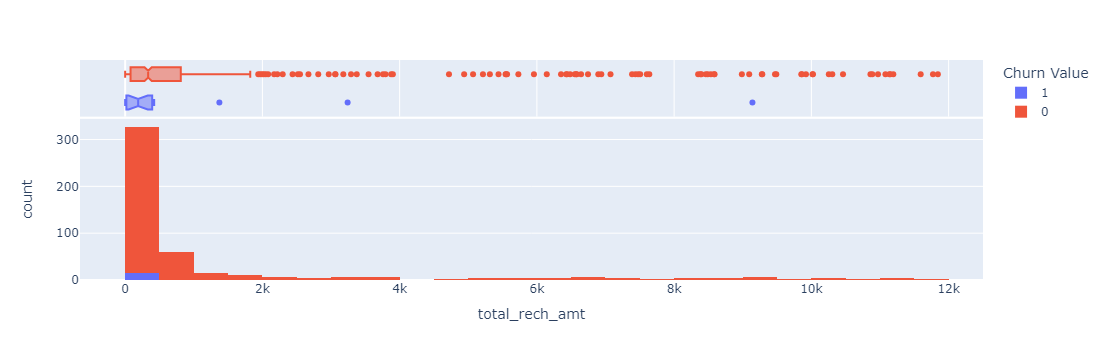

In [142]:
fig = px.histogram(df, x="total_rech_amt", color="Churn Value",
                   marginal="box")
fig.show()

# Boxplots
Box plots are useful for comparing the distributions of multiple data sets, identifying potential outliers, and visualizing the spread and skewness of the data. They are commonly used in statistical analysis, data exploration, and reporting.

In [143]:
df.groupby('Churn Value')['aug_vbc_5g'].quantile([.50,.75,.95,.99])

Churn Value      
0            0.50     104.5800
             0.75     293.6200
             0.95    4746.2200
             0.99    7671.0120
1            0.50      59.4350
             0.75     159.1825
             0.95    1257.5885
             0.99    5126.3737
Name: aug_vbc_5g, dtype: float64

In [144]:
df.drop(['aug_vbc_5g'], axis=1, inplace=True)

In [145]:
corr_df = df.copy()

In [146]:
# Introuce binaries options for binary questions
df_dummies = pd.get_dummies(corr_df[['Churn Value','Phone Service','Multiple Lines','Internet Service','Online Security',
                                 'Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV',
                                 'Streaming Movies', 'Streaming Music', 'Unlimited Data']])
df_dummies.head()

,Churn Value,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_Yes,Internet Service_No,Internet Service_Yes,Online Security_No,Online Security_Yes,Online Backup_No,...,Premium Tech Support_No,Premium Tech Support_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_Yes,Streaming Music_No,Streaming Music_Yes,Unlimited Data_No,Unlimited Data_Yes
0,1,False,True,False,True,False,True,True,False,True,...,False,True,True,False,False,True,False,True,False,True
1,0,False,True,False,True,True,False,True,False,False,...,True,False,False,True,True,False,True,False,True,False
2,0,False,True,True,False,False,True,True,False,True,...,True,False,False,True,True,False,True,False,False,True
3,0,False,True,True,False,False,True,True,False,True,...,True,False,False,True,True,False,True,False,False,True
4,0,True,False,True,False,False,True,True,False,True,...,True,False,True,False,False,True,True,False,False,True


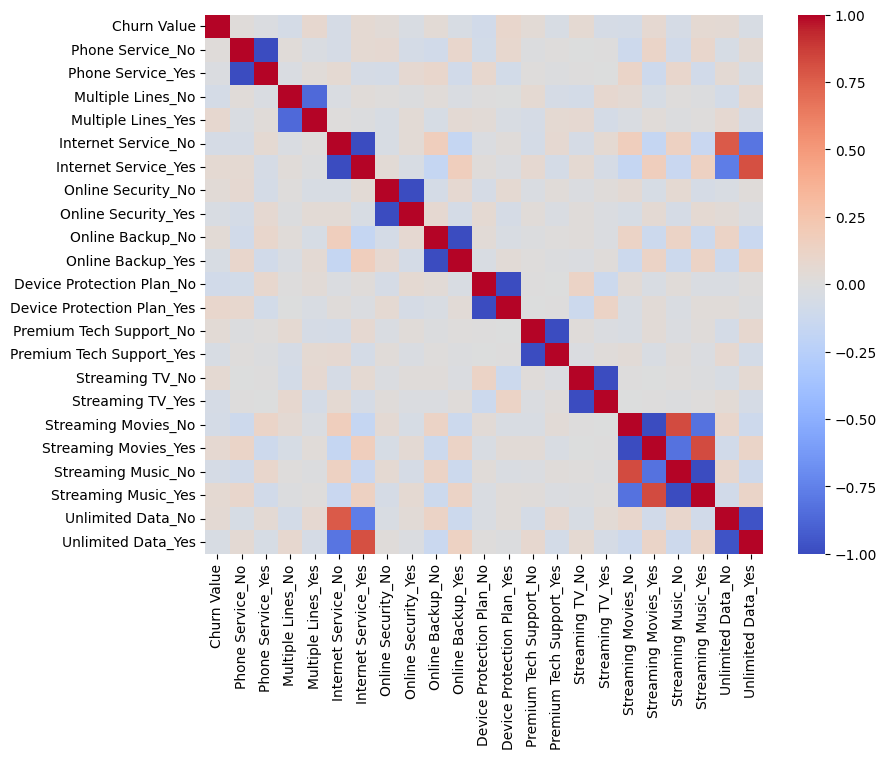

In [147]:
plt.figure(figsize=(9, 7))
sns.heatmap(df_dummies.corr(), annot=False, cmap='coolwarm')

plt.show()

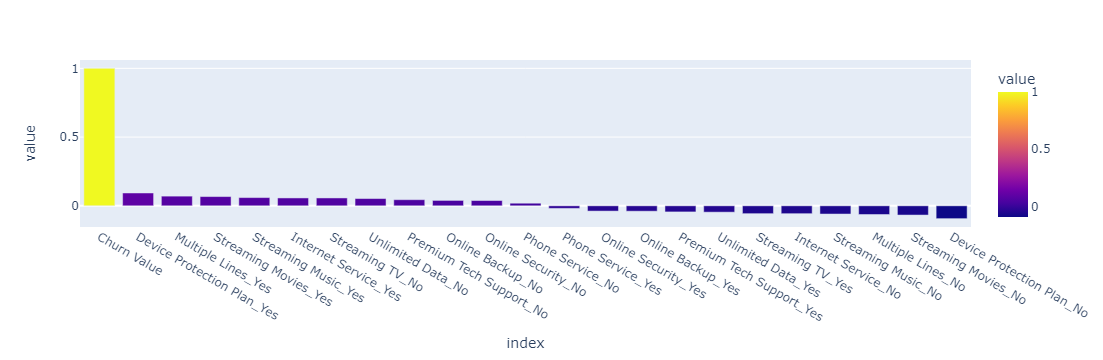

In [148]:
fig = px.bar(df_dummies.corr()['Churn Value'].sort_values(ascending = False), 
             color = 'value')
fig.show()

## Observation

not having multiple lines, online security has a correlation with churn value

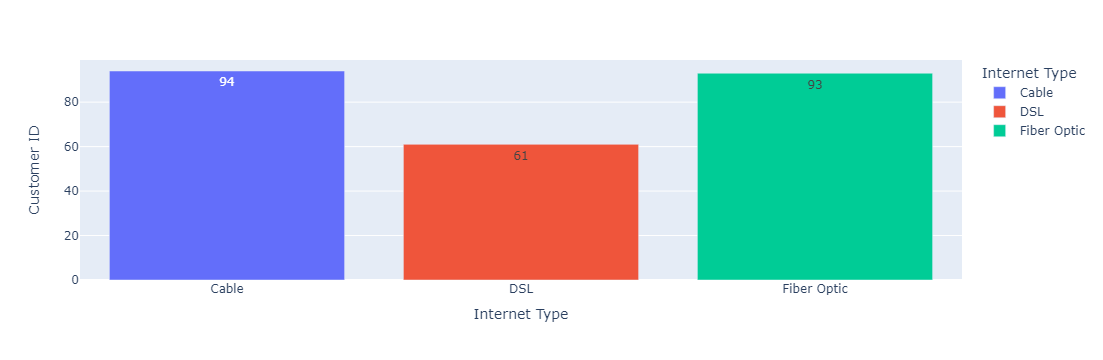

In [149]:
fig = px.bar(df.groupby('Internet Type')['Customer ID'].count().reset_index(),
             x='Internet Type',
             y='Customer ID', 
             color = 'Internet Type',
             text = 'Customer ID')
fig.show()

## Observation

Most of the clients are connected to the fiber optic internet. We also see a group of customers who do not use Internet services (most likely use only phone services), and apparently the churn rate among such customers is lower (according to the correlation graph, but we will check this later).

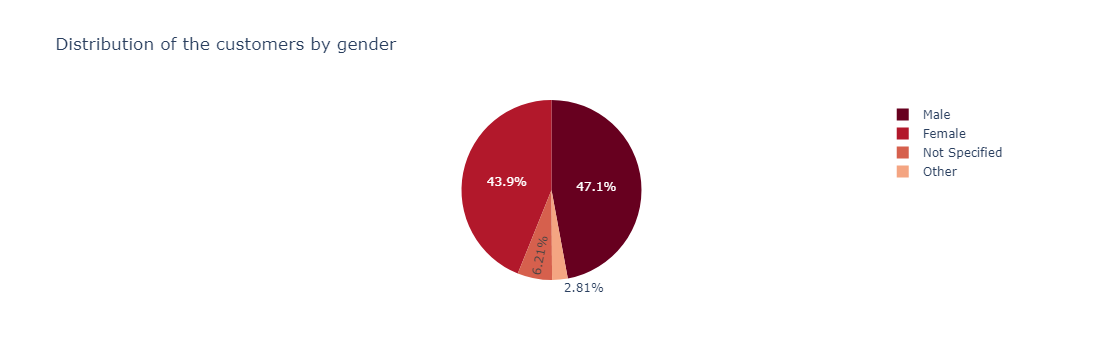

In [150]:
fig = px.pie(df.groupby('Gender')['Customer ID'].count().reset_index(), 
            values='Customer ID', 
            names='Gender',
            color_discrete_sequence=px.colors.sequential.RdBu,
            title = 'Distribution of the customers by gender')

fig.show()

## Observation
We have an almost equal number of men and women in the data set. Let's see if there is a difference in the churn rate:

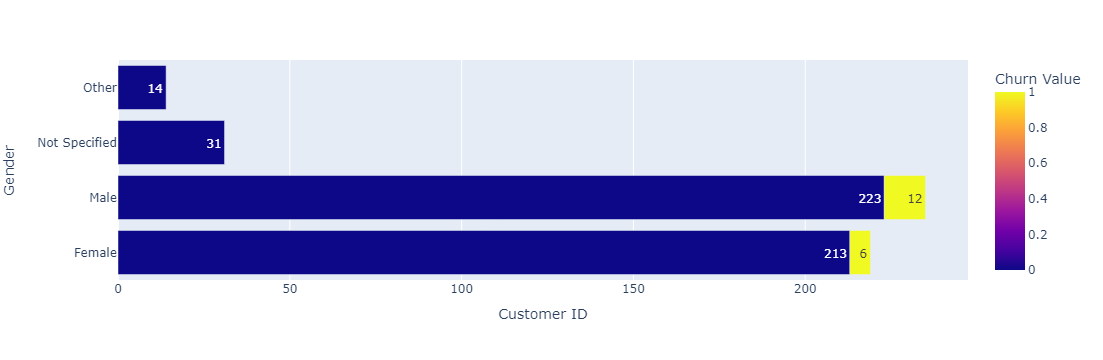

In [151]:
fig = px.bar(df.groupby(['Gender','Churn Value'])['Customer ID'].count().reset_index(),
             x="Customer ID",
             y="Gender", 
             color="Churn Value", 
             text = 'Customer ID'
            )
fig.show()

## Observation

The difference does not look signficant. The proportion of churn is almost similar

# Data Processing & Feature engineering

In [152]:
data = df.copy()

# Drop ID columns

In [153]:
data = data.drop(["Location ID", "Service ID", "area_codes", "Status ID"], axis=1)

In [154]:
data = data.drop(['Customer ID','zip_code','state','county','latitude','longitude', 
                  'night_pck_user', 'fb_user', 'Customer Status'], axis = 1)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Month                       499 non-null    int64  
 1   Month of Joining            499 non-null    int64  
 2   Gender                      499 non-null    object 
 3   Age                         499 non-null    float64
 4   Married                     499 non-null    object 
 5   Dependents                  499 non-null    object 
 6   Number of Dependents        499 non-null    float64
 7   roam_ic                     499 non-null    float64
 8   roam_og                     499 non-null    float64
 9   loc_og_t2t                  499 non-null    float64
 10  loc_og_t2m                  499 non-null    float64
 11  loc_og_t2f                  499 non-null    float64
 12  loc_og_t2c                  499 non-null    float64
 13  std_og_t2t                  499 non-null

We will treat the missing values now although they are present in very few columns

In [156]:
data['Internet Type'].value_counts()

Internet Type
Cable          94
Fiber Optic    93
DSL            61
Name: count, dtype: int64

In [157]:
data['Internet Type'].fillna("Other", inplace=True)
data['total_rech_data'].fillna(data['total_rech_data'].mean(), inplace=True)

# Label Encoding

In [158]:
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [159]:
data = data.apply(lambda x: encode_data(x))
data.head()

,Month,Month of Joining,Gender,Age,Married,Dependents,Number of Dependents,roam_ic,roam_og,loc_og_t2t,...,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Satisfaction Score,Churn Category,Churn Reason,Churn Value,hex_id,Tenure Months
0,1,1,0,36.000000,0,0,0.0,18.88,78.59,280.32,...,1,1,1,1,3,0,3,1,60,0
1,6,6,1,36.472065,0,0,0.0,69.46,72.08,255.73,...,0,0,0,0,4,2,6,0,7,0
2,7,6,1,36.442687,0,0,0.0,1012.60,115.26,52.95,...,0,0,1,1,3,2,6,0,7,1
3,8,6,1,36.837888,0,0,0.0,84.18,99.85,140.51,...,0,0,1,2,4,2,6,0,7,2
4,9,6,1,36.490214,0,0,0.0,0.00,0.00,0.00,...,1,0,1,1,1,2,6,0,7,3


# Let's look at correlation of our remaining variables with Churn Value
Correlation is a statistical measure that describes the strength and direction of the relationship between two variables. In other words, correlation measures how closely two variables are related to each other.

The correlation coefficient, typically denoted by "r", ranges from -1 to 1, with -1 indicating a perfect negative correlation, 0 indicating no correlation, and 1 indicating a perfect positive correlation. A perfect positive correlation means that as one variable increases, the other variable increases proportionally, while a perfect negative correlation means that as one variable increases, the other variable decreases proportionally.

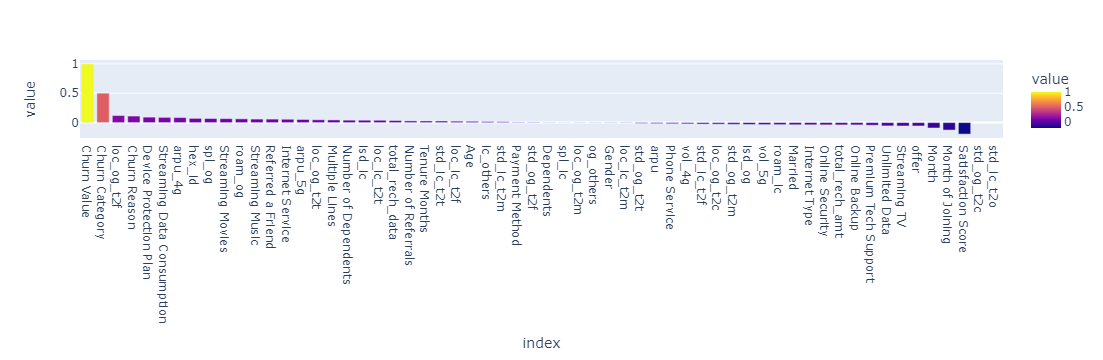

In [160]:
fig = px.bar(data.corr()['Churn Value'].sort_values(ascending = False),
             color = 'value')
fig.show()

In [161]:
data['Churn Value'].value_counts(normalize=1)

Churn Value
0    0.963928
1    0.036072
Name: proportion, dtype: float64

## Observation

We have a highly imbalanced dataset
We should use over and under sampling to make our dataset more suited for the ML model

# SMOTE Sampling 

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address class imbalance in a dataset. Class imbalance occurs when the number of instances in one class is much lower than the number of instances in another class, making it difficult for machine learning algorithms to learn from the data and predict the minority class accurately.

SMOTE works by creating synthetic samples from the minority class by interpolating new instances between existing instances. The new instances are created by selecting pairs of instances that are close to each other in the feature space and generating new instances along the line that connects them. The number of new instances to be generated is determined by a user-defined parameter that specifies the desired ratio of minority to majority class instances.

The synthetic instances generated by SMOTE are used to balance the classes in the dataset, allowing the machine learning algorithm to learn from a more balanced dataset and make better predictions on the minority class.

In [162]:
x = data.drop("Churn Value", axis = 1)
y = data['Churn Value']

In [163]:
smote = SMOTE(random_state=42)

In [164]:
x_resampled, y_resampled = smote.fit_resample(x, y)

In [165]:
print("Original dataset shape:", len(x), len(y))
print("Resampled dataset shape:", len(x_resampled), len(y_resampled))

Original dataset shape: 499 499
Resampled dataset shape: 962 962


# Undersampling

Undersampling is a technique used in machine learning to address class imbalance in a dataset. Class imbalance occurs when the number of instances in one class is much lower than the number of instances in another class, making it difficult for machine learning algorithms to learn from the data and predict the minority class accurately.

Undersampling works by randomly selecting a subset of instances from the majority class so that the number of instances in the majority class is reduced to a level comparable to the number of instances in the minority class. This creates a more balanced dataset and allows the machine learning algorithm to learn from a more representative sample of the data.

Undersampling can be effective in reducing the computational cost and training time of machine learning models, as well as reducing the risk of overfitting to the majority class.

In [166]:
undersampler = RandomUnderSampler(random_state=42)

In [ ]:
x_resampled, y_resampled = undersampler.fit_resample(x, y)

In [66]:
print("Original dataset shape:", len(x), len(y))
print("Resampled dataset shape:", len(x_resampled), len(y_resampled))

Original dataset shape: 499 499
Resampled dataset shape: 36 36


# Model Building and Testing

In [67]:
df_reason = x['Churn Reason']
y = x['Churn Category']
x = x.drop(['Churn Category', 'Churn Reason'], axis=1)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =2, test_size = 0.2)
print(x_train.shape, x_test.shape)

(399, 56) (100, 56)


## Splitting the dataset into a training and production dataset:

Training: Part of data used for training our supervised models
Test: Part of the dataset used for testing our models performance

## 1. Multi-class classification to predict Churn Category

In [69]:
def model(method, x_train, y_train, x_test, y_test):
    # Train the model
    print("Training Model......")
    method.fit(x_train, y_train)
    print("Model Trained")
    
    # Make predictions on test data
    predictions = method.predict(x_test)
    
    # Evaluate model performance and print results
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))

In [70]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 20, n_jobs=-1)

In [71]:
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score, average_precision_score, classification_report

In [72]:
model(rf, x_train, y_train, x_test, y_test)

Training Model......
Model Trained
Model accuracy:  97.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.97      1.00      0.98        97
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.97       100
   macro avg       0.24      0.25      0.25       100
weighted avg       0.94      0.97      0.96       100



## 2. Multi-label classification to predict Churn Category and Churn Reason

In [73]:
from sklearn.preprocessing import MultiLabelBinarizer
# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import CategoricalAccuracy
from sklearn.metrics import accuracy_score

In [74]:
y = pd.DataFrame(y)
y['Churn Reason'] = df_reason
y.head()

,Churn Category,Churn Reason
0,0,3
1,2,6
2,2,6
3,2,6
4,2,6


In [75]:
mlb = MultiLabelBinarizer()
y_mlb = mlb.fit_transform(y.values)
x_mlb = x.values

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_mlb, y_mlb, random_state =2, test_size = 0.2)
print(x_train.shape, x_test.shape)

(399, 56) (100, 56)


## 3. Deep Neural Network a.k.a Multi-layer Perceptron

In [85]:
n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# fit model
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
16230/16230 [==============================] - 45s 2ms/step - loss: 0.0487 - categorical_accuracy: 0.8633
Epoch 2/30
16230/16230 [==============================] - 34s 2ms/step - loss: 0.0453 - categorical_accuracy: 0.9559
Epoch 3/30
16230/16230 [==============================] - 35s 2ms/step - loss: 0.0452 - categorical_accuracy: 0.9541
Epoch 4/30
16230/16230 [==============================] - 31s 2ms/step - loss: 0.0453 - categorical_accuracy: 0.9565
Epoch 5/30
16230/16230 [==============================] - 33s 2ms/step - loss: 0.0453 - categorical_accuracy: 0.9565
Epoch 6/30
16230/16230 [==============================] - 34s 2ms/step - loss: 0.0452 - categorical_accuracy: 0.9565
Epoch 7/30
16230/16230 [==============================] - 34s 2ms/step - loss: 0.0453 - categorical_accuracy: 0.9558
Epoch 8/30
16230/16230 [==============================] - 33s 2ms/step - loss: 0.0453 - categorical_accuracy: 0.9542
Epoch 9/30
16230/16230 [==============================] - 33s 2m

In [86]:
acc = model.evaluate(x_test, y_test, verbose=0)[1]*100.0
print('Categorical Accuracy: >%.3f' % acc)

Categorical Accuracy: >95.701
